Universidad del valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de ciencias de la Computación <br>
Inteligencia Artificial <br>

Grupo # 5
Christopher García 20541 <br>
Gabriel Vicente 20498<br>
Ma. Isabel Solano 20504<br>

# Laboratorio 4: Regresión Polinomial 
Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este ejercicio. Recuerde
utilizar comentarios para describir lo que está haciendo en cada parte del proceso. Estará usando el juego de datos
proporcionado dentro del portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr
su notebook, usando https://mybinder.org/.
El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran los precios de casas
en King County, Seattle. Este juego de datos incluye los precios de las casas vendidas entre mayo 2014 y mayo
2015. Nótese que el precio es dependiente de varias características como el número de habitaciones, número de
baños, metros cuadrados de la sala, pisos, etc.
<br><br>
Para este ejercicio se le pide que proporcione un modelo de regresión polinomial que muestre la relación precio y
pies cuadrados del espacio habitable interior de los apartamentos que se muestra en el juego de datos
proporcionado. A continuación, se mencionan las generalidades de los pasos sugeridos a realizar.

## Task 1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para
ser trabajado en el notebook.

In [5]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
# Importar el conjunto de datos
datos = pd.read_csv('kc_house_data.csv')
datos.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

<AxesSubplot: >

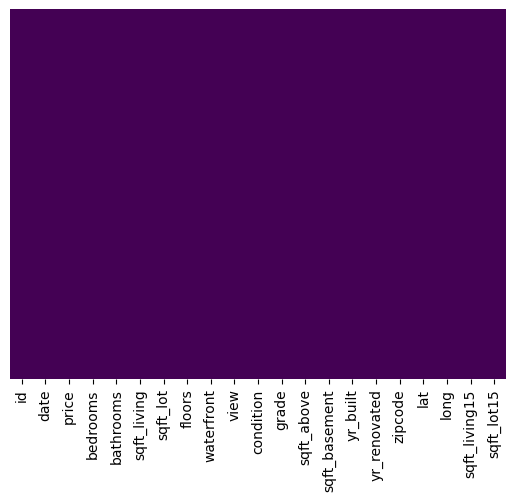

In [8]:
# Revisión de datos nulos
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
# Determinación de X y y

## Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

## Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

## Task 1.5
Haga un análisis sobre sus hallazgos